# 과제
### - 분석하려는 것에 대한 설명 :: 텍스트 셀
### - 과정 : [웹페이지 선정] -> [크롤링] -> [csv 파일저장] -> [pandas 분석] -> [시각화]

- 코랩에서 작성
- 파일명 : 이영찬.ipynb

* 웹크롤링으로 csv 생성하는 부분은, 지원되지 않는 점으로 인해 공공데이터 포털에서 가져옴.

## 주제 : 전기생산량 및 판매량 현황 데이터 시각화
## 목표 : 데이터 시각화를 통해, 연도 별 전기 생산량 및 사용량 분석을 용이하게 함.

In [33]:
#한글 폰트 설치 : colab , 런타임 다시 시작 하기

import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [3]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

# 1. 데이터 뽑아와서 csv생성
- 생략.
- csv 파일 명 : 산업통상자원부_집단에너지 전기생산 및 판매량 현황_20211231.csv

2. CSV파일 읽어오기

In [17]:
import pandas as pd
df = pd.read_csv('EleData.csv',encoding='cp949')
df.head(20)

,연도,지역난방_전기생산량,산업단지_전기생산량,병행_전기생산량,지역난방_전기판매량,산업단지_전기판매량,병행_전기판매량,국내_사업자_총_발전량,집단에너지_사업자_생산비율
0,1995,NaN,NaN,NaN,96,3747,NaN,183106,NaN
1,1996,NaN,NaN,NaN,97,4145,NaN,203786,NaN
2,1997,NaN,NaN,NaN,313,4563,NaN,222379,NaN
3,1998,535.0,6946.0,NaN,469,6529,NaN,211910,3.53
4,1999,622.0,8896.0,NaN,556,8934,NaN,234659,4.06
5,2000,1542.0,9906.0,NaN,1451,10656,NaN,261678,4.37
6,2001,3480.0,9921.0,NaN,3364,10343,NaN,281078,4.77
7,2002,4427.0,9757.0,NaN,4259,10092,NaN,302033,4.70
8,2003,4626.0,14438.0,NaN,4339,13480,NaN,317572,6.00
9,2004,4361.0,13541.0,NaN,4070,12651,NaN,341702,5.24


* df 정보 보기

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   연도              27 non-null     int64  
 1   지역난방_전기생산량      24 non-null     float64
 2   산업단지_전기생산량      24 non-null     float64
 3   병행_전기생산량        11 non-null     float64
 4   지역난방_전기판매량      27 non-null     int64  
 5   산업단지_전기판매량      27 non-null     int64  
 6   병행_전기판매량        11 non-null     float64
 7   국내_사업자_총_발전량    27 non-null     int64  
 8   집단에너지_사업자_생산비율  24 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 2.0 KB


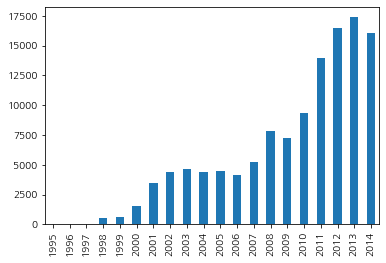

연도별 지역난방 전기생산량


In [12]:
import matplotlib.pyplot as plt
df['지역난방_전기생산량'].head(20).plot(kind='bar')
plt.xticks(range(20),labels=df['연도'].head(20),rotation=90)
plt.show()
print("연도별 지역난방 전기생산량")

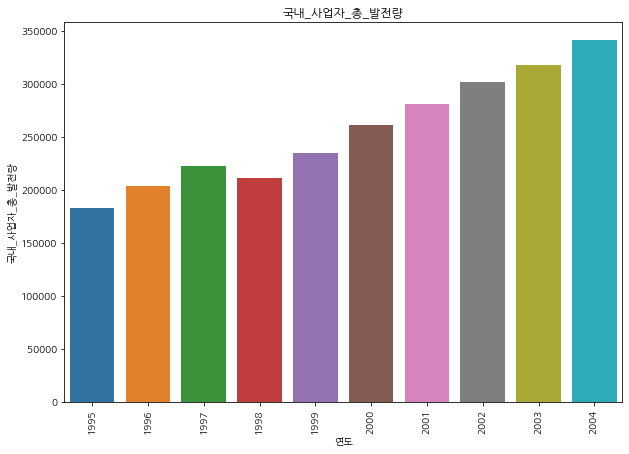

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.barplot(x='연도',y='국내_사업자_총_발전량',data=df.head(10))
plt.title('국내_사업자_총_발전량')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


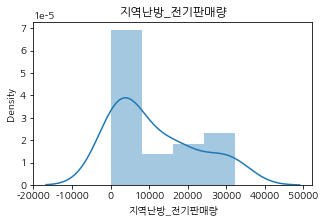

In [14]:
plt.figure(figsize=(5,3))
sns.distplot(df['지역난방_전기판매량'])
plt.title('지역난방_전기판매량')
plt.show()

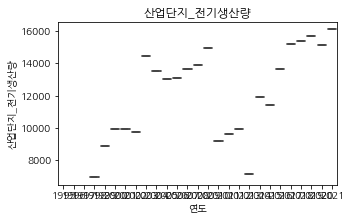

In [18]:
plt.figure(figsize=(5,3))
sns.boxplot(x='연도',y='산업단지_전기생산량',data=df)
plt.title('산업단지_전기생산량')
plt.show()